# Figure 5. Projected Precipitation

In [1]:
# Basics
import numpy as np
import pandas as pd
import string

# Plot
import matplotlib as mpl
import matplotlib.pyplot as plt

# NetCDF
import netCDF4
import xarray as xr

# GIS
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

## Functions

For this work I select the Mercator projection to visualize the results.

In [2]:
def hist_data(dsSel, bounds, extend_min=False, extend_max=False):
    """
    Generate data for histogram.
    """
    
    # Data
    df = pd.read_csv('../data/CM_match_xy.csv', index_col=['index'])
    for i in df.index:
        i_lat = int(df.loc[i, 'i_lat'] )
        i_lon = int(df.loc[i, 'i_lon'] )
        df.loc[i, 'rel_change'] = np.round(dsSel.isel(lat=i_lat, lon=i_lon).values, 3)
        
    # Data Frame for colorbar
    df_colorbar = pd.DataFrame()

    # Below Min
    if extend_min:
        i_bounds = 0
        b = bounds[i_bounds]
        df_colorbar.loc[i_bounds, 'bound'] = f'$\lt${b}'
        df_colorbar.loc[i_bounds, 'n_values'] = len(df[df['rel_change']<b])
        df_colorbar.loc[i_bounds, 'get_color'] = b*0.95
        df_colorbar
    
    # In between Min and Max
    n_bounds = len(bounds)
    for i_bounds in range(1, n_bounds):
        b_m1 = bounds[i_bounds-1]
        b = bounds[i_bounds]
        df_colorbar.loc[i_bounds, 'bound'] = f'{b_m1}-{b}'
        df_colorbar.loc[i_bounds, 'n_values'] = len(df[(df['rel_change']>=b_m1) & (df['rel_change']<b)])
        df_colorbar.loc[i_bounds, 'get_color'] = b_m1
        
    # Above Mx
    if extend_max:
        i_bounds = n_bounds-1
        b = bounds[i_bounds]
        df_colorbar.loc[n_bounds, 'bound'] = f'$\geq${b}'
        df_colorbar.loc[n_bounds, 'n_values'] = len(df[df['rel_change']>=b])
        df_colorbar.loc[n_bounds, 'get_color'] = b
    
    df_colorbar.index.name='i_bounds'
    
    return df_colorbar

def hist_colorbar(df, pcm):
    """
    Create list of colors from colorbar.
    df: df_colorbar from hist_data function
    """

    # Get colors for colorbar
    color_list = []
    for i in df.index:  
        b = df.loc[i, 'get_color']
        color_list.append(pcm.to_rgba(b))
        
    return color_list

def hist_plot(df):
    """
    Create histogram
    """

    fig, ax = plt.subplots()

    # Histogram
    ax.bar(df.index, df.n_values,
               width=0.90, 
               color=color_list, 
               edgecolor='black', lw=2, 
               tick_label='',
              )

    ax.xaxis.set_ticks_position('none')

    # Limits based on # of grid cells and # of bins
    y_lim, y_int = 200, 100
    yticks=(np.arange(0, y_lim+1, y_int))
    ax.set(ylim=(0, y_lim), yticks=yticks)

    # Hide spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set(lw=3)

    # Other tick settings
    ax.set_yticklabels(yticks, va='center')
    ax.tick_params(axis='y', length=10, width=3, labelsize=35, rotation=90)
    ax.tick_params(bottom=False, top=False, left=True, right=False, 
                   labelbottom=False, labeltop=False, labelleft=True, labelright=False)

    #plt.show()

    return fig

def hist_plot(df):
    """
    Create histogram
    """

    fig, axHist = plt.subplots()

    # Histogram
    axHist.bar(df.index, df.n_values,
               width=0.90, 
               color=color_list, 
               edgecolor='black', lw=2, 
               tick_label='',
              )

    axHist.xaxis.set_ticks_position('none')

    # Limits based on # of grid cells and # of bins
    y_lim, y_int = 200, 100
    yticks=(np.arange(0, y_lim+1, y_int))
    axHist.set(ylim=(0, y_lim), yticks=yticks)

    # Hide spines
    axHist.spines['right'].set_visible(False)
    axHist.spines['top'].set_visible(False)
    axHist.spines['bottom'].set_visible(False)
    axHist.spines['left'].set(lw=3)

    # Other tick settings
    axHist.set_yticklabels(yticks, va='center')
    axHist.tick_params(axis='y', length=10, width=3, labelsize=35, rotation=90)
    axHist.tick_params(bottom=False, top=False, left=True, right=False, 
                   labelbottom=False, labeltop=False, labelleft=True, labelright=False)

    #plt.show()

    return fig

## Figure

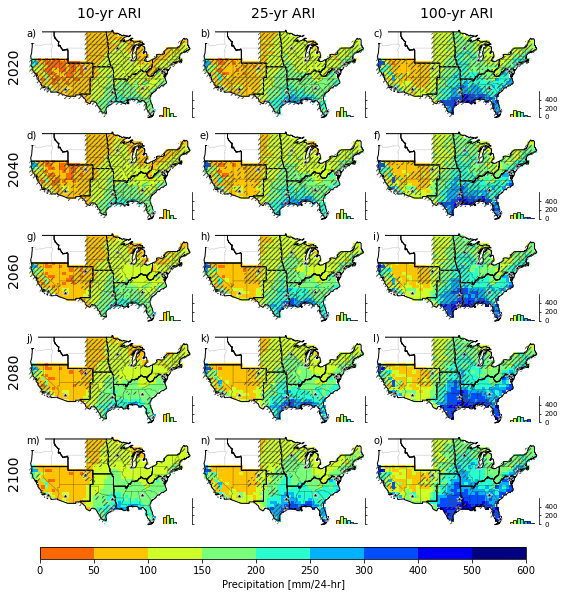

In [3]:
# GIS
proj = ccrs.Mercator()
extendCoords = [-127, -65, 23, 46.5]

# Dataset
file = '../data/03_Projected-Precipitation.nc'
ds = xr.open_dataset(file)
ds.close()

# Plot
xTitle = [1, 2, 3]
xTitlelabel = {1:'A', 2:'B', 3:'C'}
yTitle = [1, 4, 7, 10, 13]
yTitlelabel = {1:1, 4:2, 7:3, 10:4, 13:5}
i_ari_list = [3, 4, 6, 3, 4, 6, 3, 4, 6, 3, 4, 6, 3, 4, 6]
i_period_list = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]

# Bounds
bounds = [0, 50, 100, 150, 200, 250, 300, 400, 500, 600]

# Precipitation New
color_list = [
    (1.0, 0.4074074074074075, 0.0, 1.0), 
    (1.0, 0.7705156136528686, 0.0, 1.0), 
    (0.8064516129032258, 1.0, 0.16129032258064518, 1.0), 
    (0.4775458570524983, 1.0, 0.49019607843137264, 1.0), 
    (0.16129032258064513, 1.0, 0.806451612903226, 1.0), 
    (0.0, 0.692156862745098, 1.0, 1.0), 
    (0.0, 0.30000000000000004, 1.0, 1.0), 
    (0.0, 0.0, 0.9456327985739753, 1.0), 
    (0.0, 0.0, 0.5, 1.0)
]

# Create figure (one page)
fig = plt.figure(figsize=(7.5, 8.0)) #, tight_layout=True)

# define plot array's arrangement
columns = 3
rows = 5
# set projection to use
projex = ccrs.PlateCarree()

# set the colormap and norm for
# the colorbar to use
# cmap1 = mpl.cm.magma
# norm1 = mpl.colors.Normalize(vmin=0, vmax=100)

def plotmymap(axs, i, dsSel, showHist=False):
    # Data
    pcm = dsSel.plot(ax=axs, transform=ccrs.PlateCarree(), 
                     levels=bounds,
                     colors=color_list,
                     #cmap = plt.cm.jet_r,
                     add_colorbar=False, #True for debugging
                    )
    
    # Map - States and Cities
    shpStates = shpreader.Reader('../shp/cb_2018_us_state_20m_clean/cb_2018_us_state_20m.shp')
    ax.add_geometries(shpStates.geometries(), ccrs.PlateCarree(), facecolor='none', edgecolor='k', lw=0.5, alpha=0.25)
    
    shpStates = shpreader.Reader('../shp/cb_2018_us_state_20m_nw/cb_2018_us_state_20m.shp')
    axs.add_geometries(shpStates.geometries(), ccrs.PlateCarree(), facecolor='none', edgecolor='grey', lw=0.5, alpha=0.25)
    
    shpRegions = shpreader.Reader('../shp/ncar_regions_clean/ncar_regions.shp')
    axs.add_geometries(shpRegions.geometries(), ccrs.PlateCarree(), facecolor='none', edgecolor='k', lw=1.0)
    
    df = pd.read_csv('../shp/metroRegions.csv', encoding='cp1252', index_col=['Rank'])
    df = df.loc[np.r_[1:7,8:10,11:12,16,19],:]
    axs.scatter(
        df['Longitude'], df['Latitude'], transform=ccrs.Geodetic(), 
        color='k', marker='*', edgecolor='w', lw=0.5,
        #s=150, 
        label='Selected Metropolitan Regions', zorder=2,
    )
    
    # Mask (NOAA Atlas 14 90% CI)
    ds_maskSel = ds.isel(ari=i_ari_list[i-1], period=i_period_list[i-1]).mask_below
    x = ds_maskSel.lon.values
    y = ds_maskSel.lat.values
    X = (ds_maskSel.lon.values[1] - ds_maskSel.lon.values[0])/2
    Y = (ds_maskSel.lat.values[1] - ds_maskSel.lat.values[0])/2
    zm = np.ma.masked_less(ds_maskSel.values, 1)
    ax.pcolor(x-X, y-Y, zm, 
              hatch="/////", 
              #color='darkgrey', 
              ec='#4d4d4d', lw=0, 
              fc='none', 
              #alpha=0., 
              transform=ccrs.PlateCarree(), 
              zorder=3,
              shading='auto',
              )
    
    # Column title
    if i in xTitle:
        axs.set_title(str(dsSel.ari.values)+'-yr ARI', fontsize=14)
    else:
        axs.set_title("")
    
    # Row title
    if i in yTitle:
        text = str(dsSel.period.values)[-4:]
        axs.text(-133, 36, text, transform=ccrs.Geodetic(), 
                 fontsize=14, backgroundcolor='white', rotation=90)
    else:
        axs.set_ylabel("")
    
    axs.set_extent(extendCoords, ccrs.Geodetic())
    axs.spines['geo'].set_visible(False)
    
    # Plot letter
    text = string.ascii_lowercase[i-1]+')'
    axs.text(-126, 48, text, transform=ccrs.Geodetic(), 
             fontsize=10, backgroundcolor='white', rotation=0)
    
    # Histogram
    if showHist:
        df = hist_data(dsSel, bounds)
        axHist = axs.inset_axes([0.78, 0.05, 0.20, 0.27])
        # Histogram
        axHist.bar(df.index, df.n_values,
               width=0.90, 
               color=color_list, 
               edgecolor='k', lw=0.75, 
               tick_label='',
              )

        axHist.xaxis.set_ticks_position('none')

        # Limits based on # of grid cells and # of bins
        y_lim, y_int = 400, 200
        yticks=(np.arange(0, y_lim+1, y_int))
        axHist.set(ylim=(0, y_lim+y_int), yticks=yticks)

        # Hide spines
        axHist.spines['top'].set_visible(False)
        axHist.spines['bottom'].set_visible(False)
        axHist.spines['left'].set_visible(False)
        
        # Show spines
        axHist.spines['right'].set(lw=0.75)
        axHist.set_yticklabels(yticks, va='center')
        axHist.tick_params(axis='y', length=2, width=0.75, labelsize=7, rotation=0)
        
        if (i%3)==0:
            axHist.tick_params(
                bottom=False, top=False, left=False, right=True, 
                labelbottom=False, labeltop=False, labelleft=False, labelright=True)
        else:
            axHist.tick_params(
                bottom=False, top=False, left=False, right=True, 
                labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        

    return pcm  # for use by colorbar


for i in range(1, columns*rows +1):    
    # add a subplot into the array of plots
    ax = fig.add_subplot(rows, columns, i, projection=proj)
    
    dsSel = ds.isel(ari=i_ari_list[i-1], period=i_period_list[i-1]).pr_projected
    pcm = plotmymap(ax, i, dsSel, showHist=True)  # a simple maps is created on subplot

# Adjust the subplot layout parameters (horizontal colorbar)
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.10, top=0.98, wspace=0.01, hspace=0.02)
cbar_ax = fig.add_axes([0.05, 0.05, 0.90, 0.02])
cb = fig.colorbar(
    pcm, cax=cbar_ax, 
    #location='bottom', 
    orientation='horizontal',
    label='Precipitation [mm/24-hr]', 
    aspect=30,
    shrink=0.80,
    #extend='max',
)
#cb.set_ticks([-100, -25, -10, 10, 25, 50, 75, 100, 150, 200])

plt.show()  # this plot all the maps

In [4]:
fig.savefig(f'../img/Fig-5_Projected_Precipitation.png', dpi=500, bbox_inches='tight')